In [226]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rasterstats
import matplotlib.pyplot as plt
import pandas as pd

In [227]:
# Read the provinces of Thailand shapefile 
provinces = gpd.read_file(r'D:\Projects\Ajarn Noppol\005_COVID Project\COVID Thailand\Abstract\Version_2\Thai_Pro_Boun.shp')

In [228]:
# Read the NO2 raster of 2019 January
no2 = rasterio.open(r'D:\Projects\Ajarn Noppol\005_COVID Project\COVID Thailand\OMI_2016_2020_Thai\2019Feb_Thai.tif', mode = 'r')


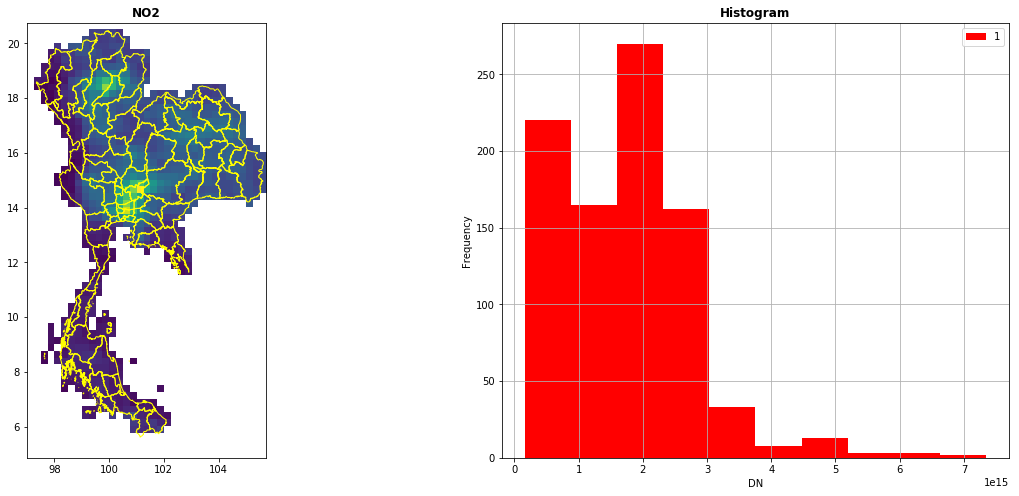

In [229]:
# Plotting the raster and the provinces shapefile together 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
show(no2, ax = ax1, title = 'NO2')
provinces.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
show_hist(no2, title = 'Histogram', ax = ax2)
plt.show()

In [230]:
# Assign raster values to a numpy nd array
nitrogendioxide_array = no2.read(1)

affine = no2.transform

In [231]:
# Calculating the zonal statistics 
avg_no2  = rasterstats.zonal_stats(provinces, nitrogendioxide_array, affine = affine,
                                      stats = ['mean'], 
                                      geojson_out = True)

C:\ProgramData\Anaconda3\lib\site-packages\rasterstats\io.py:300: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [232]:
# Extracting the average NO2 data from the list
avg_nitrogendioxide = []
i = 0

while i < len(avg_no2):
    avg_nitrogendioxide.append(avg_no2[i]['properties'])
    i = i + 1

In [233]:
# Transfering the infromation from the list to a pandas DataFrame

avg_no2_thai_province_2019feb = pd.DataFrame(avg_nitrogendioxide)
print(avg_no2_thai_province_2019feb)

   ENGTYPE_1  ID_0  ID_1  ISO    NAME_0              NAME_1    TYPE_1  \
0   Province   228     1  THA  Thailand       Amnat Charoen  Changwat   
1   Province   228     2  THA  Thailand           Ang Thong  Changwat   
2   Province   228     3  THA  Thailand  Bangkok Metropolis  Changwat   
3   Province   228     4  THA  Thailand           Bueng Kan  Changwat   
4   Province   228     5  THA  Thailand            Buri Ram  Changwat   
..       ...   ...   ...  ...       ...                 ...       ...   
72  Province   228    73  THA  Thailand          Udon Thani  Changwat   
73  Province   228    74  THA  Thailand         Uthai Thani  Changwat   
74  Province   228    75  THA  Thailand           Uttaradit  Changwat   
75  Province   228    76  THA  Thailand                Yala  Changwat   
76  Province   228    77  THA  Thailand            Yasothon  Changwat   

            mean  
0   2.034706e+15  
1   4.019308e+15  
2   5.132610e+15  
3   1.551443e+15  
4   2.151282e+15  
..       

In [234]:
avg_no2_thai_province_2019feb.to_csv('Thai_OMI_Monthly_MeanNO2_Province_2019Feb.csv', encoding='utf-8')